In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
df.isna().sum()  #to check whetehr there are null in horsepower

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

### we know that pandas is infering name is object and it is categorical but we know orgin and cylinder are both categorical so we need to convert orgin to category

In [6]:
df.origin = df.origin.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    int64   
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB


In [7]:
df.cylinders = df.cylinders.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    category
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB


### to drop name and year colunns( coz name is unique in each instant and year does not affect the kmpl)


In [10]:
df1=df.drop(columns=['year','name'],axis=1)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


#### to remove the 6 NAN values in horse power(coz 6 values doesnt affect the whole distribution and it was gn as ? in data and we repleced it with NAN)

In [11]:
drop_NAN=df1[df1['horsepower'].isna()].index   #for dropping the NAn values
drop_NAN

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [14]:
drop=df1.drop(index=drop_NAN,axis=0)
drop

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


#### drop is our final cleaned data with no missing values and no columns(name and year)
#df = df.drop(index=df[df['horsepower']=='?'].index,axis=0) alternate way

In [15]:
drop.isna().sum()   #drop is our final cleaned data with no missing values and no columns(name and year)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
Kilometer_per_liter    0
dtype: int64

### Assigning dependent(y) and independent variable(2 cat and 4 numerical)=(x)

In [20]:
#IDV=independent variables
IDV=drop.iloc[:,0:6]
IDV

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [21]:
#DV= dependent
DV=drop.iloc[:,-1]
DV

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

### Applying Ttest to check linearity. we have 6 IDV and 1 DV we have to check each IDV with DV

In [24]:
#apply T-test-- pearsonr is used to cal t test
from scipy.stats import pearsonr

In [26]:
pearsonr(drop.origin,drop.Kilometer_per_liter)

(0.5652087566805262, 1.8110802019906616e-34)

In [27]:
r,p=pearsonr(drop.origin,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.8110802019906616e-34


In [28]:
r,p=pearsonr(drop.cylinders,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.3113836126440812e-80


In [29]:
r,p=pearsonr(drop.displacement,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.6606417936100068e-90


In [30]:
r,p=pearsonr(drop.horsepower,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 7.031988957280459e-81


In [31]:
r,p=pearsonr(drop.weight,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 6.015295897114415e-102


In [32]:
r,p=pearsonr(drop.acceleration,drop.Kilometer_per_liter)
if p>0.05:
    print("Not significant",p)
else:
    print("Significant",p)
    

Significant 1.778576132110161e-18


## to check Multicollinearity, we find correlation and for that we will use only Numerical IDV's

In [23]:
#used to check with heatmap
IDV.corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


<AxesSubplot:>

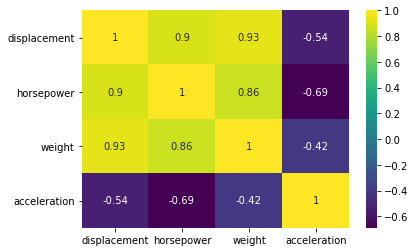

In [33]:
sns.heatmap(IDV.corr(),annot=True,cmap='viridis')

### We checked with IDV alone and multicollinearity exists since all are significant

In [37]:
for i in IDV.select_dtypes(exclude='category'):
    for j in IDV.select_dtypes(exclude='category'):
        correlation=0
        p_value=0
        if(i!=j):
            print("\nCorrelation between",i,"and",j,":")
            correlation,p_value=pearsonr(IDV[i],IDV[j])  
            print("Correlation = ",correlation,"\nP_value = ",p_value)
            if p_value>0.05:
                print("Not Significant.")
            else:
                print("Significant.")
            print()


Correlation between displacement and horsepower :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between displacement and weight :
Correlation =  0.9329944040890106 
P_value =  3.489083946207091e-175
Significant.


Correlation between displacement and acceleration :
Correlation =  -0.5438004967345673 
P_value =  1.5085401440805055e-31
Significant.


Correlation between horsepower and displacement :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between horsepower and weight :
Correlation =  0.8645377375741443 
P_value =  1.3643468773732557e-118
Significant.


Correlation between horsepower and acceleration :
Correlation =  -0.6891955103342364 
P_value =  1.5818862297818033e-56
Significant.


Correlation between weight and displacement :
Correlation =  0.9329944040890106 
P_value =  3.489083946207091e-175
Significant.


Correlation between weight and horsepower :
Correlation =  0.8645377

### we are going to find correlation between 4 numerical IDVs and 1 Dv. for that we are excluding the categorical values (origin,cylinder) from drop and storing it as drop_cat

doubt? why to do this?

In [39]:
drop_category=drop.iloc[:,2:7]
drop_category

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...
393,140.0,86.0,2790,15.6,11.478880
394,97.0,52.0,2130,24.6,18.706323
395,135.0,84.0,2295,11.6,13.604599
396,120.0,79.0,2625,18.6,11.904024


In [40]:
drop_category.corr()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,1.000000


<AxesSubplot:>

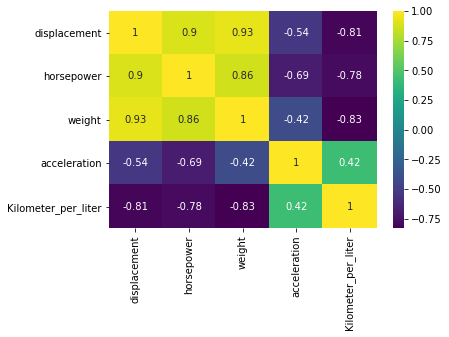

In [41]:
sns.heatmap(drop_category.corr(),annot=True,cmap='viridis')

In [42]:
for i in drop_category.select_dtypes(exclude='category'):
    for j in drop_category.select_dtypes(exclude='category'):
        correlation=0
        p_value=0
        if(i!=j):
            print("\nCorrelation between",i,"and",j,":")
            correlation,p_value=pearsonr(drop_category[i],drop_category[j])  
            print("Correlation = ",correlation,"\nP_value = ",p_value)
            if p_value>0.05:
                print("Not Significant.")
            else:
                print("Significant.")
            print()


Correlation between displacement and horsepower :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between displacement and weight :
Correlation =  0.9329944040890106 
P_value =  3.489083946207091e-175
Significant.


Correlation between displacement and acceleration :
Correlation =  -0.5438004967345673 
P_value =  1.5085401440805055e-31
Significant.


Correlation between displacement and Kilometer_per_liter :
Correlation =  -0.8051269467334896 
P_value =  1.6606417936100068e-90
Significant.


Correlation between horsepower and displacement :
Correlation =  0.8972570018434691 
P_value =  1.5108887258741506e-140
Significant.


Correlation between horsepower and weight :
Correlation =  0.8645377375741443 
P_value =  1.3643468773732557e-118
Significant.


Correlation between horsepower and acceleration :
Correlation =  -0.6891955103342364 
P_value =  1.5818862297818033e-56
Significant.


Correlation between horsepower and Kilometer_per_liter

## To check Normality of errors

#### we are using shapiro because dataselt is below 5000. 
#if >5000 use Anderson ;
As a rule of thumb, we reject the null hypothesis if p < 0.05.

In [45]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(drop.Kilometer_per_liter)
shapiro_test

ShapiroResult(statistic=0.967170000076294, pvalue=1.0495841706870124e-07)

In [46]:
s,p=shapiro(drop.Kilometer_per_liter)
if p>0.05:
    print("Significant")
else:
    print("Not Significant")

Not Significant


#### Feature Transformation technique for Normality check ,since the normality cheked using shapiro is not significant
#FT has 4 types where in this case we use LOG TRANSFORMATION

#doubt why we use log??

In [49]:
np.log10(drop_category.Kilometer_per_liter)

0      0.883808
1      0.804627
2      0.883808
3      0.832656
4      0.858985
         ...   
393    1.059900
394    1.271988
395    1.133686
396    1.075694
397    1.119897
Name: Kilometer_per_liter, Length: 392, dtype: float64

### To build Linear model

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x=drop.iloc[:,:-1]   #independent variables stored in x
x

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [52]:
y=drop.iloc[:,-1]   #dependent values stored in y
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)  # test size=30% and train size =70%

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 6)
(118, 6)
(274,)
(118,)


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
l=LinearRegression()  #storing LR in variable l

In [58]:
l.fit(x_train,y_train) #fit x and y train and assign in l

LinearRegression()

In [59]:
l.coef_  #y=mx+c ; coeff is m value (wherein m is slope)

array([ 0.44504806, -0.37780734,  0.00554783, -0.02557467, -0.00196373,
       -0.01762912])

In [60]:
l.intercept_   #intercept is c value

19.022982365926133

### To find Train RMSE


Things to find: 

Train_pred


Error for train data

KDE Plot

find the mean squared error for train

find the R sqaured value for train 

In [62]:
train_pred=l.predict(x_train)
train_pred

array([10.6488789 ,  5.85087151, 12.49604892,  7.00074848,  6.54820678,
        6.93224481, 13.1420131 , 10.83652481, 10.43564407, 10.03357013,
        5.65971882, 12.54094785, 12.69610285,  8.30612609, 10.26053568,
       12.87990979,  9.81818906,  4.94759216, 12.32417636, 10.63700608,
       12.0409062 , 13.43574149, 10.70396044, 12.55386384, 12.42910445,
        8.73759566,  9.78373988,  8.19787438,  4.78560682,  8.07494249,
        9.43731501,  7.73159572, 13.48441616,  8.45161292, 10.24138256,
       10.11426992,  5.22473411, 11.55356224, 11.44902019, 14.16465376,
       13.02399043, 12.26440721,  9.36474678, 11.8462322 , 11.59115186,
       12.71093088, 13.1663043 , 13.50274413, 12.94933443, 11.73984742,
        9.32128456, 11.64657883, 10.22346694, 10.03591167, 13.35089956,
        7.43229103,  4.72672755, 10.52793984,  6.88236709, 11.1194541 ,
       12.63566269, 11.9405706 , 11.87973797, 13.76179659, 11.38864219,
       10.92857728,  7.26164118, 11.57586642, 12.17444594,  9.32

In [63]:
error=y_train-train_pred

In [64]:
error   #error for train data

78    -1.720861
91    -0.324003
378    3.659412
285    0.226695
290    0.041521
         ...   
360    3.095828
282   -1.022064
144   -1.230127
226   -0.058248
350    2.436699
Name: Kilometer_per_liter, Length: 274, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

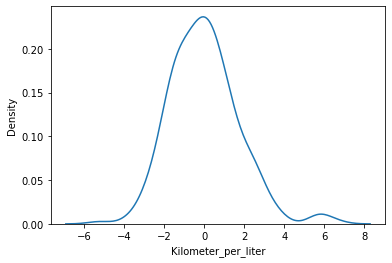

In [65]:
sns.kdeplot(error)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
mean_squared_error(train_pred,y_train)

2.9526863417717726

In [68]:
np.sqrt(mean_squared_error(train_pred,y_train))     #Train RMSE

1.7183382501043771

In [69]:
r2_score(y_train,train_pred)   # R sq of Train RMSE

0.7174127050002899

### To find Test RMSE


Things to find: 

Test_pred


Error for test data

KDE Plot

find the mean squared error for test

find the R sqaured value for test

In [71]:
test_pred=l.predict(x_test)
test_pred

array([10.83800926,  6.10097237, 11.06724525, 13.39654354,  5.57864722,
       10.87009764, 12.92161704, 12.63336113,  9.4876982 ,  8.68485001,
        5.59871002,  5.56296835, 12.12307503, 14.16289085, 12.76479106,
       12.24562774, 10.52917759,  5.15072593,  7.27544504, 13.17416404,
       10.77467501,  5.36663926, 11.07056612,  9.77446143,  5.30699955,
       12.53671934, 12.11006853,  5.22031931,  6.2698978 , 11.65259368,
        9.92479056, 11.57686619,  8.57348985,  9.95197488, 13.99687132,
        9.17998502,  5.91638194, 12.31883032, 12.53248064,  6.50451818,
       12.9985754 , 11.13753369, 12.08299991, 11.72896315, 10.76874085,
        8.60105369, 10.20154657,  8.52272819, 10.30355024,  9.9445086 ,
       13.31527299, 12.94598504, 12.47094151,  9.73204094,  3.57770084,
        5.82624834,  8.89786206,  8.85317307,  8.33154968, 13.60282349,
       13.41717276,  8.88145384, 13.56407271, 11.66626534, 10.19353704,
        8.17424698, 10.81544352, 10.96758334, 11.61540261,  7.62

In [72]:
error2=y_test-test_pred

In [73]:
error2

327    4.637222
41    -0.148960
184   -0.438653
244    4.927150
229    1.223652
         ...   
246    0.234973
211   -0.698591
95     1.802529
220    0.829699
136    0.640342
Name: Kilometer_per_liter, Length: 118, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

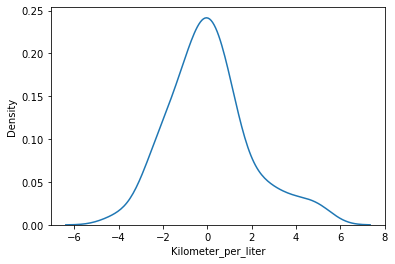

In [74]:
sns.kdeplot(error2)

In [75]:
mean_squared_error(test_pred,y_test)

3.403309655611138

In [76]:
np.sqrt(mean_squared_error(test_pred,y_test))   #Test RMSE

1.8448061295461748

In [77]:
r2_score(y_test,test_pred)    #test r sq

0.7212284644028213

### now check hetroscadacity

In [78]:
import statsmodels.api as sm

### adding constant in x_train and assigning it in x_train1 to perform matrix multiplication 

note: it cant be added in y(dependent variable)

In [79]:
x_train1=sm.add_constant(x_train)
x_train1

,const,origin,cylinders,displacement,horsepower,weight,acceleration
78,1.0,2,4,120.0,87.0,2979,19.5
91,1.0,1,8,400.0,150.0,4464,12.0
378,1.0,1,4,105.0,63.0,2125,14.7
285,1.0,1,8,305.0,130.0,3840,15.4
290,1.0,1,8,351.0,142.0,4054,14.3
...,...,...,...,...,...,...,...
360,1.0,2,6,145.0,76.0,3160,19.6
282,1.0,1,4,140.0,88.0,2890,17.3
144,1.0,3,4,76.0,52.0,1649,16.5
226,1.0,1,6,231.0,105.0,3425,16.9


In [80]:
model=sm.OLS(y_train,x_train1).fit()


In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.717
Model:                             OLS   Adj. R-squared:                  0.711
Method:                  Least Squares   F-statistic:                     113.0
Date:                 Tue, 30 Nov 2021   Prob (F-statistic):           2.53e-70
Time:                         18:49:26   Log-Likelihood:                -537.12
No. Observations:                  274   AIC:                             1088.
Df Residuals:                      267   BIC:                             1114.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.0230      1.444     13.171      0.000      16.179      21.867
origin           0.4450      0.173      2.568      0.011       0.104       0.786
cylinders       -0.3778      0.201     -1.878      0.061      -0.774       0.018
displacement     0.0055      0.005      1.119      0.264      -0.004       0.015
horsepower      -0.0256      0.009     -2.892      0.004      -0.043      -0.008
weight          -0.0020      0.000     -4.948      0.000      -0.003      -0.001
acceleration    -0.0176      0.063     -0.279      0.780      -0.142       0.107
==============================================================================
Omnibus:                       28.740   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.463
Skew:                           0.660   Prob(JB):                     3.65e-10
Kurtosis:                       4.438   Cond. No.                     4.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""